In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('letter-recognition.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
df.shape

(20000, 17)

In [4]:
df.isna().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [11]:
x = df.drop('letter', axis=1)
y = df['letter']

In [16]:
y

0        T
1        I
2        D
3        N
4        G
        ..
19995    D
19996    C
19997    T
19998    S
19999    A
Name: letter, Length: 20000, dtype: object

In [18]:
x_train = x.iloc[:16000, :]
x_test = x.iloc[16000:, :]
y_train = y.iloc[:16000]
y_test = y.iloc[16000:]


In [19]:
from sklearn.svm import SVC

In [20]:
model = SVC(C=3) # C is the penalty

In [21]:
model.fit(x_train, y_train)

SVC(C=3)

In [22]:
y_pred = model.predict(x_test)

In [23]:
y_pred

array(['U', 'N', 'V', ..., 'T', 'S', 'A'], dtype=object)

In [24]:
model.score(x_test, y_test)

0.94725

In [29]:
y_grid = pd.DataFrame((np.column_stack([y_test,y_pred])))

In [30]:
y_grid

,0,1
0,U,U
1,N,N
2,V,V
3,I,I
4,N,N
...,...,...
3995,D,D
3996,C,C
3997,T,T
3998,S,S


In [34]:
import string
lab = list(string.ascii_uppercase[0:26])
plab=["Predicted "+ s for s in lab]

In [35]:
from sklearn import metrics
import seaborn as sns

cm = metrics.confusion_matrix(y_test, y_pred,labels=lab)

df_cm = pd.DataFrame(cm, index=[i for i in lab],
                     columns= [i for i in plab])

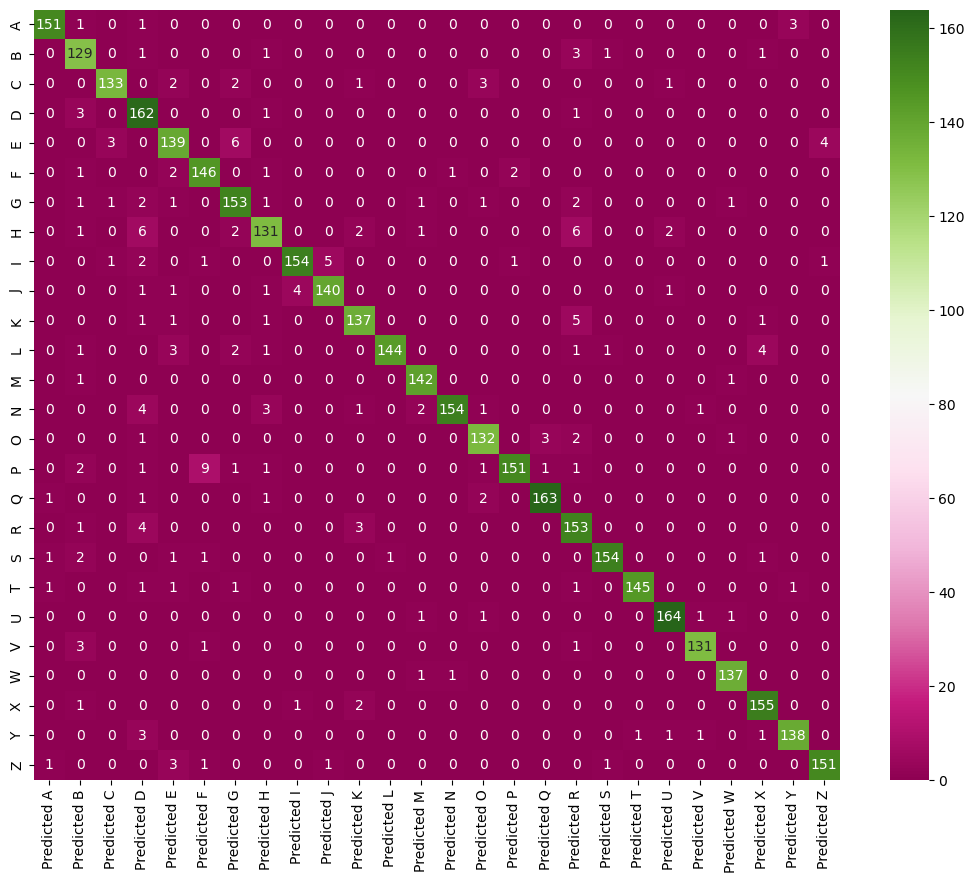

In [36]:
plt.figure(figsize=(13,10))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='PiYG')
plt.show()